In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import plotly.express as px
import plotly.graph_objects as go
from sklearn.ensemble import IsolationForest
sns.set(font_scale=1.2)
import matplotlib as mpl
mpl.style.use('default')


In [385]:
def plot_forest(data,estimators,contamination = 0.5):
	outliner = IsolationForest(n_estimators=estimators, contamination=contamination)
	y_pred = outliner.fit_predict(data)
	all_data = pd.DataFrame(data,columns=['x','y'])
	all_data['outliner'] = y_pred
	plt.figure(figsize=(12,7))
	inliners = all_data[all_data.outliner==1].drop(columns='outliner')
	outliners = all_data[all_data.outliner==-1].drop(columns='outliner')
	plt.scatter(inliners.x,inliners.y,edgecolors='green',label='inliner')
	plt.scatter(outliners.x,outliners.y,edgecolors='red',label='outliner')
	legend = plt.legend()
	legend.legendHandles[1]._sizes = [40]
	plt.show()

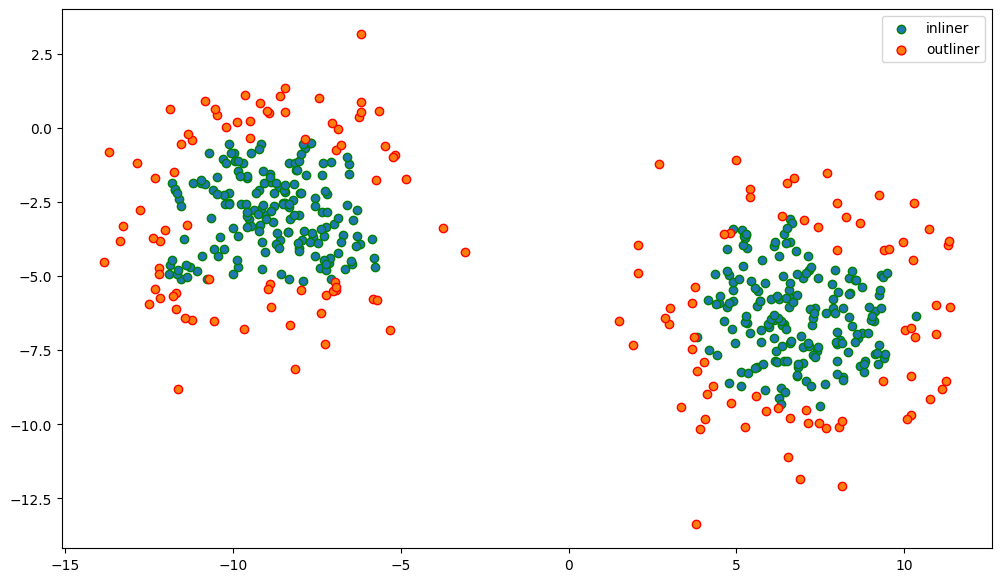

In [386]:
data = make_blobs(n_samples=500,centers=2,cluster_std=2,random_state=15)[0]
plot_forest(data,estimators=25,contamination=0.3)

W powyższym przypadku ilość estymatorów >25 nie powoduje żadnych zmian. Przy contamination najlepiej się sprawdza wartość 0.3
